In [2]:
import numpy as np
import math
import PIL
import pandas as pd
import matplotlib.pyplot as plt
import os

na=[[1,0,0,1,0,0,0,0],
   [1,1,0,1,0,0,0,0],
   [1,0,1,1,0,0,0,0],
   [1,0,0,1,0,0,0,0],
   [0,0,0,0,0,1,0,0],
   [0,0,0,0,1,0,1,0],
   [0,0,0,1,1,1,1,1],
   [0,0,0,1,0,0,0,1]]

In [26]:
folder="square_range_mixed"

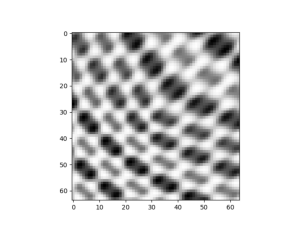

In [27]:
im=PIL.Image.open(folder+"/goal.png")
plt.axis("off")
plt.imshow(im)
im.close()

In [5]:
x=np.linspace(-7.96875,7.96875,64)
x= x.repeat(64)
x=x.reshape((64,64))
x=np.stack((x,x.transpose()),axis=2)
r=np.sqrt(np.square(x).sum(axis=2))
r=np.append(x,np.expand_dims(r,2),axis=2)

In [6]:
def ftype(matrix, kind):
    if kind<-0.5:
        return np.sin(matrix)
    elif kind<0.0:
        return np.cos(matrix)
    elif kind<.5:
        return np.exp((np.square(matrix/2)/-2))/(2*(2*math.pi)**.5)
    return matrix

In [7]:
def cppn(ex):
    h=np.matmul(x,ex[0:6].reshape((2,3))*2)
    h0=ftype(h[:,:,0],ex[18])
    (h[:,:,0].shape,"shape of h0")
    h1=ftype(h[:,:,1],ex[19])
    h2=ftype(h[:,:,2],ex[20])
    h = np.stack((h0,h1,h2),axis=2)
    h=np.matmul(h,ex[6:15].reshape((3,3))*2)
    h0=ftype(h[:,:,0],ex[21])
    h1=ftype(h[:,:,1],ex[22])
    h2=ftype(h[:,:,2],ex[23])
    h = np.stack((h0,h1,h2),axis=2)
    h=np.matmul(h,ex[15:18].reshape((3,1))*2)
    return 1/(1 + np.exp(-h))

In [8]:
def cppn_range(ex):
    h=np.matmul(r,ex[0:12].reshape((3,4))*2)
    h0=ftype(h[:,:,0],ex[27])
    h1=ftype(h[:,:,1],ex[28])
    h2=ftype(h[:,:,2],ex[29])
    h3=ftype(h[:,:,3],ex[30])
    h = np.stack((h0,h1,h2,h3),axis=2)
    h=np.matmul(h,ex[12:24].reshape((4,3))*2)
    h0=ftype(h[:,:,0],ex[31])
    h1=ftype(h[:,:,1],ex[32])
    h2=ftype(h[:,:,2],ex[33])
    h = np.stack((h0,h1,h2),axis=2)
    h=np.matmul(h,ex[24:27].reshape((3,1))*2)
    return 1/(1 + np.exp(-h))

In [60]:
my_csv = None
for f in os.listdir(folder):
    if f[-4:] == ".csv":
        my_csv = f
ar=pd.read_csv(f"{folder}/{my_csv}")
pics = []
for i in range(6):
    for j in range(6):
        partion=ar.loc[
            (ar["behavior_0"]>(-12+i*24/7))&
            (ar["behavior_0"]<(-12+(i+1)*24/7))&
            (ar["behavior_1"]>(-12+j*24/7))&
            (ar["behavior_1"]<(-12+(j+1)*24/7))]
        if partion.empty:
            pics.append(na)
        else:
            max_obj=partion[(partion["objective"].max()==partion["objective"])]
            pics.append(cppn(max_obj[max_obj.columns[6:]].to_numpy()[0]))

<ipython-input-6-d028b9d50b18>:14: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-h))


In [28]:
my_csv = None
for f in os.listdir(folder):
    if f[-4:] == ".csv":
        my_csv = f
ar=pd.read_csv(f"{folder}/{my_csv}")
pics = []
for i in range(6):
    for j in range(6):
        partion=ar.loc[
            (ar["behavior_0"]>(-17+i*34/7))&
            (ar["behavior_0"]<(-17+(i+1)*34/7))&
            (ar["behavior_1"]>(-17+j*34/7))&
            (ar["behavior_1"]<(-17+(j+1)*34/7))]
        if partion.empty:
            pics.append(na)
        else:
            max_obj=partion[(partion["objective"].max()==partion["objective"])]
            pics.append(cppn_range(max_obj[max_obj.columns[6:]].to_numpy()[0]))

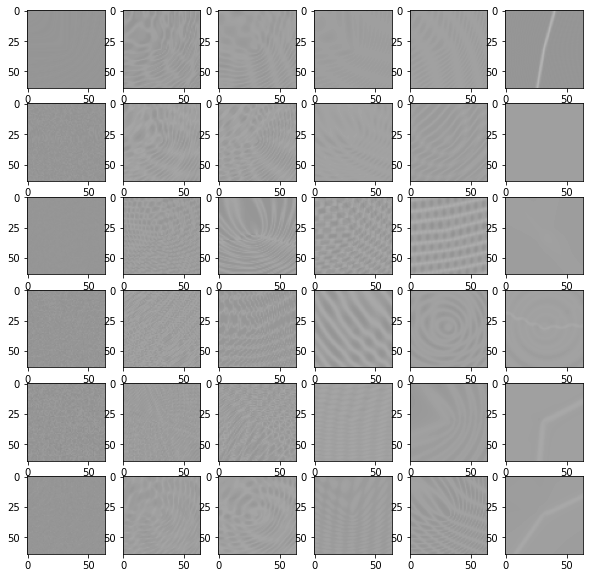

In [29]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Best Images")
for i,p in enumerate(pics):
    plt.subplot(6,6,i+1)
    plt.imshow(p, cmap='Greys_r',vmin=0,vmax=1)